In [212]:
from fastai.vision.all import *

In [213]:
from utils import *
from fastbook import *

In [214]:
path = untar_data(URLs.MNIST)

In [215]:
Path.BASE_PATH = path

In [216]:
path.ls()

(#2) [Path('training'),Path('testing')]

In [217]:
(path/'training').ls()

(#10) [Path('training/9'),Path('training/0'),Path('training/7'),Path('training/6'),Path('training/1'),Path('training/8'),Path('training/4'),Path('training/3'),Path('training/2'),Path('training/5')]

In [218]:
zeros = (path/'training'/'0').ls().sorted()
ones = (path/'training'/'1').ls().sorted()
twos = (path/'training'/'2').ls().sorted()
threes = (path/'training'/'3').ls().sorted()
fours = (path/'training'/'4').ls().sorted()
fives = (path/'training'/'5').ls().sorted()
sixes = (path/'training'/'6').ls().sorted()
sevens = (path/'training'/'7').ls().sorted()
eights = (path/'training'/'8').ls().sorted()
nines = (path/'training'/'9').ls().sorted()

In [219]:
valid_zeros = (path/'testing'/'0').ls().sorted()
valid_ones = (path/'testing'/'1').ls().sorted()
valid_twos = (path/'testing'/'2').ls().sorted()
valid_threes = (path/'testing'/'3').ls().sorted()
valid_fours = (path/'testing'/'4').ls().sorted()
valid_fives = (path/'testing'/'5').ls().sorted()
valid_sixes = (path/'testing'/'6').ls().sorted()
valid_sevens = (path/'testing'/'7').ls().sorted()
valid_eights = (path/'testing'/'8').ls().sorted()
valid_nines = (path/'testing'/'9').ls().sorted()

In [220]:
# make tensors for each number
zero_tensors = [tensor(Image.open(o)) for o in zeros]
one_tensors = [tensor(Image.open(o)) for o in ones]
two_tensors = [tensor(Image.open(o)) for o in twos]
three_tensors = [tensor(Image.open(o)) for o in threes]
four_tensors = [tensor(Image.open(o)) for o in fours]
five_tensors = [tensor(Image.open(o)) for o in fives]
six_tensors = [tensor(Image.open(o)) for o in sixes]
seven_tensors = [tensor(Image.open(o)) for o in sevens]
eight_tensors = [tensor(Image.open(o)) for o in eights]
nine_tensors = [tensor(Image.open(o)) for o in nines]
len(zero_tensors),len(one_tensors),len(two_tensors),len(three_tensors),len(four_tensors),len(five_tensors),len(six_tensors),len(seven_tensors),len(eight_tensors),len(nine_tensors)

(5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949)

In [221]:
# make tensors for each valid number
valid_zero_tensors = [tensor(Image.open(o)) for o in valid_zeros]
valid_one_tensors = [tensor(Image.open(o)) for o in valid_ones]
valid_two_tensors = [tensor(Image.open(o)) for o in valid_twos]
valid_three_tensors = [tensor(Image.open(o)) for o in valid_threes]
valid_four_tensors = [tensor(Image.open(o)) for o in valid_fours]
valid_five_tensors = [tensor(Image.open(o)) for o in valid_fives]
valid_six_tensors = [tensor(Image.open(o)) for o in valid_sixes]
valid_seven_tensors = [tensor(Image.open(o)) for o in valid_sevens]
valid_eight_tensors = [tensor(Image.open(o)) for o in valid_eights]
valid_nine_tensors = [tensor(Image.open(o)) for o in valid_nines]

In [222]:
# stack and normalize
def normalize(tensor):
    mean, std = tensor.mean(), tensor.std()
    return (tensor - mean) / std

# Normalize the stacked digits
stacked_zeros = normalize(torch.stack(zero_tensors).float()/255)
stacked_ones = normalize(torch.stack(one_tensors).float()/255)
stacked_twos = normalize(torch.stack(two_tensors).float()/255)
stacked_threes = normalize(torch.stack(three_tensors).float()/255)
stacked_fours = normalize(torch.stack(four_tensors).float()/255)
stacked_fives = normalize(torch.stack(five_tensors).float()/255)
stacked_sixes = normalize(torch.stack(six_tensors).float()/255)
stacked_sevens = normalize(torch.stack(seven_tensors).float()/255)
stacked_eights = normalize(torch.stack(eight_tensors).float()/255)
stacked_nines = normalize(torch.stack(nine_tensors).float()/255)

stacked_threes.shape

torch.Size([6131, 28, 28])

In [223]:
valid_stacked_zeros = normalize(torch.stack(valid_zero_tensors).float()/255)
valid_stacked_ones = normalize(torch.stack(valid_one_tensors).float()/255)
valid_stacked_twos = normalize(torch.stack(valid_two_tensors).float()/255)
valid_stacked_threes = normalize(torch.stack(valid_three_tensors).float()/255)
valid_stacked_fours = normalize(torch.stack(valid_four_tensors).float()/255)
valid_stacked_fives = normalize(torch.stack(valid_five_tensors).float()/255)
valid_stacked_sixes = normalize(torch.stack(valid_six_tensors).float()/255)
valid_stacked_sevens = normalize(torch.stack(valid_seven_tensors).float()/255)
valid_stacked_eights = normalize(torch.stack(valid_eight_tensors).float()/255)
valid_stacked_nines = normalize(torch.stack(valid_nine_tensors).float()/255)

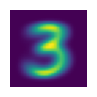

In [224]:
mean3 = stacked_threes.mean(0)
show_image(mean3);

In [225]:
digits = [tensor(stacked_zeros[:5000]),tensor(stacked_ones[:5000]),tensor(stacked_twos[:5000]),tensor(stacked_threes[:5000]),
             tensor(stacked_fours[:5000]),tensor(stacked_fives[:5000]),tensor(stacked_sixes[:5000]),tensor(stacked_sevens[:5000]),
             tensor(stacked_eights[:5000]),tensor(stacked_nines[:5000])]

stacked_digits = torch.stack(digits).float()

In [226]:
stacked_digits.shape

torch.Size([10, 5000, 28, 28])

In [227]:
mean_digits = stacked_digits.mean(1)


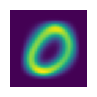

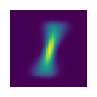

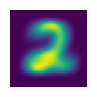

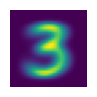

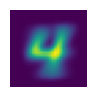

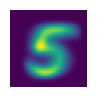

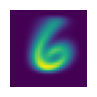

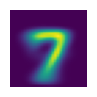

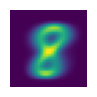

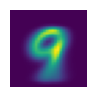

In [228]:
mean_digits.shape

for i in range(10):
    show_image(mean_digits[i])

In [229]:
for i in range(10):
    print(i)
    print(F.l1_loss(mean3.float(),mean_digits[i])) 
    print(F.mse_loss(mean3,mean_digits[i]).sqrt())

0
tensor(0.3475)
tensor(0.5872)
1
tensor(0.3558)
tensor(0.6043)
2
tensor(0.2527)
tensor(0.4848)
3
tensor(0.0043)
tensor(0.0074)
4
tensor(0.3556)
tensor(0.6016)
5
tensor(0.1953)
tensor(0.3481)
6
tensor(0.3496)
tensor(0.6036)
7
tensor(0.3666)
tensor(0.6030)
8
tensor(0.2219)
tensor(0.3981)
9
tensor(0.3323)
tensor(0.5496)


In [230]:
def find_digit(x):
    comparisons = tensor([F.mse_loss(x,mean_digits[i]).sqrt() for i in range(10)])
    min_index = torch.argmin(comparisons)
    return min_index

tensor(4)

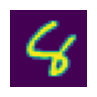

In [390]:
digit = stacked_eights[7]
show_image(digit)
find_digit(digit)

In [330]:
# sgd

train_data = torch.cat([stacked_zeros, stacked_ones, stacked_twos, stacked_threes,
                        stacked_fours, stacked_fives, stacked_sixes, stacked_sevens, 
                        stacked_eights, stacked_nines]).view(-1, 28*28)
train_labels = torch.cat([
    torch.zeros(len(zeros)),
    torch.ones(len(ones)),
    torch.ones(len(twos)) * 2,
    torch.ones(len(threes)) * 3,
    torch.ones(len(fours)) * 4,
    torch.ones(len(fives)) * 5,
    torch.ones(len(sixes)) * 6,
    torch.ones(len(sevens)) * 7,
    torch.ones(len(eights)) * 8,
    torch.ones(len(nines)) * 9
]).unsqueeze(1)

valid_data = torch.cat([valid_stacked_zeroes, valid_stacked_ones, valid_stacked_twos, valid_stacked_threes,
                        valid_stacked_fours, valid_stacked_fives, valid_stacked_sixes, valid_stacked_sevens, 
                        valid_stacked_eights, valid_stacked_nines]).view(-1, 28*28)
valid_labels = torch.cat([
    torch.zeros(len(valid_zeros)),
    torch.ones(len(valid_ones)),
    torch.ones(len(valid_twos)) * 2,
    torch.ones(len(valid_threes)) * 3,
    torch.ones(len(valid_fours)) * 4,
    torch.ones(len(valid_fives)) * 5,
    torch.ones(len(valid_sixes)) * 6,
    torch.ones(len(valid_sevens)) * 7,
    torch.ones(len(valid_eights)) * 8,
    torch.ones(len(valid_nines)) * 9
]).unsqueeze(1)

In [331]:
train_data.shape,train_labels.shape,valid_data.shape,valid_labels.shape

(torch.Size([60000, 784]),
 torch.Size([60000, 1]),
 torch.Size([10000, 784]),
 torch.Size([10000, 1]))

In [332]:
# make dsets

train_dataset = list(zip(train_data, train_labels))

valid_dataset = list(zip(valid_data, valid_labels))

In [342]:
# init params with linear model

input_size = 28 * 28 
output_size = 10  # Number of output classes (0-9 digits)

linear = nn.Linear(input_size, output_size)

print(linear.weight)
print(linear.bias)

Parameter containing:
tensor([[ 0.0149,  0.0217, -0.0106,  ..., -0.0251,  0.0170,  0.0101],
        [-0.0223,  0.0287,  0.0282,  ..., -0.0104, -0.0355, -0.0044],
        [ 0.0174,  0.0007, -0.0340,  ...,  0.0262,  0.0084,  0.0231],
        ...,
        [-0.0016,  0.0334, -0.0261,  ..., -0.0244, -0.0178,  0.0021],
        [ 0.0174, -0.0207, -0.0333,  ..., -0.0141,  0.0137,  0.0174],
        [ 0.0027, -0.0122,  0.0351,  ..., -0.0353, -0.0271, -0.0027]], requires_grad=True)
Parameter containing:
tensor([-0.0070, -0.0122,  0.0111,  0.0060,  0.0100, -0.0265,  0.0309,  0.0306,  0.0354, -0.0127], requires_grad=True)


In [334]:
# cross entropy loss function

def softmax(x):
    return torch.exp(x) / torch.exp(x).sum(dim=1, keepdim=True)

def cross_entropy_loss(outputs, labels):
    probs = softmax(outputs)
    labels = labels.squeeze(1).long()
    one_hot_labels = F.one_hot(labels, num_classes=probs.shape[1]).float()
    loss = -torch.sum(one_hot_labels * torch.log(probs + 1e-8)) / outputs.shape[0]
    return loss


In [343]:
dl = DataLoader(train_dataset, batch_size=256)
xb,yb = first(dl)
xb.shape,yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [344]:
valid_dl = DataLoader(valid_dataset, batch_size=256)

In [345]:
def calc_grad(xb, yb, model):
    preds = model(xb)
    loss = cross_entropy_loss(preds, yb)
    loss.backward()

In [346]:
def train_epoch(model, lr, params):
    for xb,yb in dl:
        calc_grad(xb,yb,model)
        for p in params:
            p.data -= p.grad*lr
            p.grad.zero_()

In [347]:
def batch_accuracy(xb, yb):
    preds = torch.argmax(xb, dim=1)
    correct = preds == yb.squeeze()
    return correct.float().mean()

In [348]:
def validate_epoch(model):
    accs = [batch_accuracy(model(xb), yb) for xb,yb in valid_dl]
    return round(torch.stack(accs).mean().item(), 4)

In [349]:
lr = 0.01
params = linear.weight,linear.bias
print(params)

(Parameter containing:
tensor([[ 0.0149,  0.0217, -0.0106,  ..., -0.0251,  0.0170,  0.0101],
        [-0.0223,  0.0287,  0.0282,  ..., -0.0104, -0.0355, -0.0044],
        [ 0.0174,  0.0007, -0.0340,  ...,  0.0262,  0.0084,  0.0231],
        ...,
        [-0.0016,  0.0334, -0.0261,  ..., -0.0244, -0.0178,  0.0021],
        [ 0.0174, -0.0207, -0.0333,  ..., -0.0141,  0.0137,  0.0174],
        [ 0.0027, -0.0122,  0.0351,  ..., -0.0353, -0.0271, -0.0027]], requires_grad=True), Parameter containing:
tensor([-0.0070, -0.0122,  0.0111,  0.0060,  0.0100, -0.0265,  0.0309,  0.0306,  0.0354, -0.0127], requires_grad=True))


In [350]:
for i in range(30):
    train_epoch(linear, lr, params)
    print(validate_epoch(linear), end=' ')

0.1518 0.3354 0.4473 0.5045 0.544 0.5724 0.5973 0.6162 0.6302 0.6396 0.6503 0.6591 0.6665 0.6723 0.6781 0.6848 0.6894 0.6932 0.6985 0.7023 0.7062 0.7098 0.7122 0.7154 0.7181 0.7205 0.7237 0.7262 0.7286 0.7309 

In [352]:
# basic optimizer

class BasicOptim:
    def __init__(self,params,lr): self.params,self.lr = list(params),lr
    
    def step(self, *args, **kwargs):
        for p in self.params: p.data -= p.grad.data * self.lr
            
    def zero_grad(self, *args, **kwargs):
        for p in self.params: p.grad = None
            

In [354]:
opt = BasicOptim(linear.parameters(), lr)

In [355]:
def train_epoch(model):
    for xb,yb in dl:
        calc_grad(xb, yb, model)
        opt.step()
        opt.zero_grad()

In [356]:
def train_model(model, epochs):
    for i in range(epochs):
        train_epoch(model)
        print(validate_epoch(model), end=' ')

In [357]:
train_model(linear, 20)

0.7325 0.7344 0.736 0.7378 0.7407 0.7427 0.7443 0.7452 0.7472 0.7486 0.7494 0.7501 0.7513 0.7534 0.7546 0.7566 0.7579 0.7584 0.76 0.7603 

In [358]:
# layering basic nn


class BasicNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(BasicNN, self).__init__()
        self.hidden = nn.Linear(input_size, hidden_size)
        self.output = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        x = F.relu(self.hidden(x))
        x = self.output(x)
        return x

# Define input, hidden, and output sizes
input_size = 28 * 28
hidden_size = 128
output_size = 10

# Initialize the model
basic_model = BasicNN(input_size, hidden_size, output_size)

In [359]:
opt = BasicOptim(basic_model.parameters(), lr)

In [361]:
train_model(basic_model, 100)

0.7533 0.7598 0.7659 0.7732 0.7789 0.7838 0.7891 0.7935 0.7983 0.8032 0.8074 0.8105 0.8151 0.8188 0.8227 0.8258 0.8286 0.8318 0.8348 0.8384 0.8417 0.8449 0.848 0.8508 0.8534 0.8553 0.8582 0.8612 0.8644 0.8669 0.8691 0.8718 0.8751 0.8777 0.8798 0.8824 0.8847 0.8868 0.8885 0.8907 0.8931 0.8949 0.8961 0.898 0.8998 0.9015 0.9026 0.9036 0.9045 0.9064 0.908 0.9102 0.9117 0.912 0.9135 0.9146 0.9154 0.9167 0.9178 0.9187 0.9202 0.9217 0.9225 0.9236 0.9247 0.9251 0.926 0.926 0.9269 0.9276 0.9281 0.9287 0.9295 0.9307 0.9312 0.9316 0.9326 0.9329 0.933 0.9334 0.9343 0.9353 0.9354 0.9358 0.9363 0.937 0.9377 0.9383 0.9384 0.9386 0.9391 0.9392 0.9395 0.9404 0.9409 0.9413 0.942 0.9427 0.9429 0.9431 

In [362]:
# Define the enhanced neural network with more layers

class EnhancedNN(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size):
        super(EnhancedNN, self).__init__()
        self.hidden_layers = nn.ModuleList()
        
        # Input layer
        self.hidden_layers.append(nn.Linear(input_size, hidden_sizes[0]))
        
        # Hidden layers
        for i in range(1, len(hidden_sizes)):
            self.hidden_layers.append(nn.Linear(hidden_sizes[i-1], hidden_sizes[i]))
        
        # Output layer
        self.output = nn.Linear(hidden_sizes[-1], output_size)
        
    def forward(self, x):
        for layer in self.hidden_layers:
            x = F.relu(layer(x))  # Non-linearity after each hidden layer
        x = self.output(x)  # Output layer
        return x

In [363]:
input_size = 28 * 28
hidden_sizes = [128, 64]  # Example of adding two hidden layers
output_size = 10

# Initialize the enhanced model
model = EnhancedNN(input_size, hidden_sizes, output_size)

In [364]:
opt = BasicOptim(model.parameters(), lr)

In [370]:
train_model(model, 100)

0.9767 0.9767 0.9768 0.9767 0.9768 0.9769 0.9769 0.9771 0.977 0.977 0.977 0.977 0.977 0.977 0.977 0.9771 0.9771 0.9771 0.9771 0.9771 0.9771 0.9771 0.9771 0.9771 0.9771 0.9772 0.9773 0.9775 0.9775 0.9776 0.9776 0.9777 0.9777 0.9777 0.9777 0.9778 0.9778 0.9777 0.9777 0.978 0.978 0.9781 0.9781 0.9782 0.9783 0.9783 0.9783 0.9784 0.9784 0.9785 0.9785 0.9785 0.9785 0.9784 0.9784 0.9784 0.9784 0.9784 0.9785 0.9785 0.9786 0.9787 0.9787 0.9788 0.9786 0.9787 0.9788 0.9789 0.9789 0.9789 0.9791 0.9791 0.9791 0.9792 0.9793 0.9793 0.9793 0.9794 0.9796 0.9796 0.9798 0.98 0.98 0.98 0.9801 0.9801 0.98 0.9801 0.98 0.9801 0.9801 0.9803 0.9803 0.9803 0.9803 0.9803 0.9804 0.9804 0.9804 0.9804 

In [371]:
def predict_image(model, image):
    # Set the model to evaluation mode
    model.eval()
    
    # Flatten the image if necessary
    if len(image.shape) > 1:
        image = image.view(-1, 28*28)
    
    # Forward pass: compute predicted outputs by passing inputs to the model
    with torch.no_grad():
        outputs = model(image)
    
    # Apply softmax to get probabilities
    probabilities = torch.softmax(outputs, dim=1)
    
    # Get the predicted class (the index with the highest probability)
    predicted_class = torch.argmax(probabilities, dim=1)
    
    return predicted_class.item(), probabilities

Predicted class: 8
Probabilities: tensor([[1.3629e-10, 2.5763e-07, 5.3621e-10, 9.2534e-10, 1.6485e-03, 3.7609e-04, 2.3258e-05, 2.0266e-09, 9.9489e-01, 3.0640e-03]])


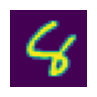

In [389]:
image = stacked_eights[7]
show_image(image)

predicted_class, probabilities = predict_image(model, image)
print(f'Predicted class: {predicted_class}')
print(f'Probabilities: {probabilities}')